In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()

X = data.data
y = data.target

X = pd.DataFrame(X, columns=data.feature_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

params = {'n_neighbors': range(1,20)}

gs = GridSearchCV(clf, params)
gs.fit(X_train, y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)})

In [5]:
gs.best_params_

{'n_neighbors': 14}

In [6]:
gs.best_score_

0.9648351648351647

In [7]:
gs.cv_results_

{'mean_fit_time': array([0.04386497, 0.00074587, 0.00082383, 0.00075674, 0.00074167,
        0.00073886, 0.00075965, 0.00075932, 0.00074782, 0.00073934,
        0.00074091, 0.00073915, 0.00075569, 0.00074978, 0.00073681,
        0.00075068, 0.00074444, 0.00075455, 0.00075126]),
 'std_fit_time': array([8.42314334e-02, 2.71075109e-05, 1.01490911e-04, 2.64629587e-05,
        1.26243932e-05, 1.60850398e-05, 1.26450885e-05, 1.83116644e-05,
        6.07027000e-06, 1.07452479e-05, 1.05494227e-05, 1.81733145e-05,
        1.27918622e-05, 2.21805662e-05, 1.44848656e-05, 2.91846156e-06,
        1.21351075e-05, 2.47819570e-05, 2.33611279e-05]),
 'mean_score_time': array([0.00940838, 0.00385599, 0.00390415, 0.00389915, 0.00389428,
        0.00398741, 0.00403428, 0.00404778, 0.00398726, 0.00405188,
        0.00400257, 0.00409789, 0.00404773, 0.00417953, 0.00410972,
        0.0041151 , 0.00419416, 0.00429502, 0.00421081]),
 'std_score_time': array([5.10736941e-03, 1.28483275e-04, 9.65431459e-05, 5.39

<ErrorbarContainer object of 3 artists>

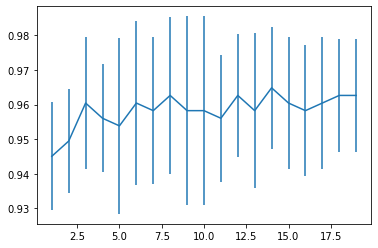

In [8]:
plt.errorbar(gs.cv_results_['param_n_neighbors'].data,
             gs.cv_results_['mean_test_score'],
             yerr=gs.cv_results_['std_test_score'],
              label='test')
              


In [9]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=8, max_iter= 2000)


In [10]:
clf

MLPClassifier(max_iter=2000, random_state=8)

In [11]:
params = {
    'hidden_layer_sizes': [(10,),(50,),(100, ),
                           (10,10,), (50, 50, ), (100, 100, ),
                           (10, 5, ), (5,5, ), (30,20, 10), (100, 1000, 50,), 
                           (1000, 100, 50),(10,10,10),(50, 50, 50), (100, 100, 100,)
                           ],
    'activation': ['identity', 'logistic', 'tanh','relu'],
    'beta_1': [0.9, 0.8, 0.7, 0.6, 0.5],
    'beta_2': [0.999, 0.9, 0.8, 0.7],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
    }


In [ ]:
gs = GridSearchCV(clf, params)
gs.fit(X_train, y_train)